In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DA assignment data.csv')

In [3]:
df.isnull().mean()*100

Room type                     0.0
Hostel ID                     0.0
City ID                       0.0
Total days booked             0.0
Booked date: Day of week      0.0
Booked date: Day of month     0.0
Booked date: Month of year    0.0
Booked days before            0.0
Average per day price         0.0
dtype: float64

In [4]:
for col in df.columns:
    print(df[col].value_counts())

Room type
1    113796
2     41024
Name: count, dtype: int64
Hostel ID
108    18577
75     12990
33     10385
7       9204
41      8133
5       6865
29      6820
174     6452
34      5898
11      5749
39      5497
31      4992
38      4569
12      3923
36      3705
40      3561
42      3382
25      3277
28      3270
35      3207
17      3013
10      2991
9       2599
141     2543
27      2461
37      2407
109     2244
240     1936
32      1332
22      1189
24       999
26       488
273       96
207       64
8          2
Name: count, dtype: int64
City ID
28     28962
24     18836
9      15871
66     12990
7       9204
21      9175
5       6865
11      5749
26      4992
32      4569
12      3923
30      3705
3       3561
33      3382
29      3207
2       3013
10      2991
132     2639
23      2461
31      2407
99      2244
27      1332
18      1189
20       999
22       488
1         64
8          2
Name: count, dtype: int64
Total days booked
2      40617
1      37814
3      24171
4      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154820 entries, 0 to 154819
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Room type                   154820 non-null  int64 
 1   Hostel ID                   154820 non-null  int64 
 2   City ID                     154820 non-null  int64 
 3   Total days booked           154820 non-null  int64 
 4   Booked date: Day of week    154820 non-null  int64 
 5   Booked date: Day of month   154820 non-null  int64 
 6   Booked date: Month of year  154820 non-null  int64 
 7   Booked days before          154820 non-null  int64 
 8   Average per day price       154820 non-null  object
dtypes: int64(8), object(1)
memory usage: 10.6+ MB


In [38]:
df[df['Room type'] == "Private"]

,Room type,Hostel ID,City ID,Total days booked,Booked date: Day of week,Booked date: Day of month,Booked date: Month of year,Booked days before,Average per day price,Advance Booking
113796,Private,5,5,1,1,1,6,0,2401.28,0
113797,Private,5,5,1,1,1,6,1,2259.35,1
113798,Private,5,5,1,1,1,6,7,2103.30,4-7
113799,Private,5,5,1,1,1,9,0,2754.19,0
113800,Private,5,5,1,1,1,9,12,2898.52,8-30
...,...,...,...,...,...,...,...,...,...,...
154815,Private,273,132,10,5,10,7,17,1818.24,8-30
154816,Private,273,132,10,6,4,7,11,1818.24,8-30
154817,Private,273,132,10,6,11,7,18,1818.24,8-30
154818,Private,273,132,10,7,5,7,12,1818.24,8-30


In [6]:
df['Average per day price'] = df['Average per day price'].astype(str).str.replace(',', '', regex = False)
df['Average per day price'] = pd.to_numeric(df['Average per day price'], errors = 'coerce')

In [7]:
df['Average per day price'].dtype

dtype('float64')

In [8]:
bins = [-1, 0, 1, 3, 7, 30, df['Booked days before'].max()]
labels = ['0', '1', '2-3', '4-7', '8-30', '31+']

df['Advance Booking'] = pd.cut(df['Booked days before'], bins = bins, labels = labels, ordered = True)

df.head()

,Room type,Hostel ID,City ID,Total days booked,Booked date: Day of week,Booked date: Day of month,Booked date: Month of year,Booked days before,Average per day price,Advance Booking
0,1,5,5,1,1,1,6,0,759.49,0
1,1,5,5,1,1,1,6,1,1106.41,1
2,1,5,5,1,1,1,9,0,858.76,0
3,1,5,5,1,1,1,9,2,882.73,2-3
4,1,5,5,1,1,1,12,0,911.85,0


In [9]:
df['Advance Booking'].value_counts()

Advance Booking
8-30    50228
0       33281
4-7     23136
2-3     20703
1       16186
31+      9788
Name: count, dtype: int64

In [39]:
df[df['Room type'] == "Private"].describe()

,Hostel ID,City ID,Total days booked,Booked date: Day of week,Booked date: Day of month,Booked date: Month of year,Booked days before,Average per day price
count,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000,41024.000000
mean,53.414855,25.618443,2.676068,4.188451,16.059502,6.791585,10.163977,2304.836767
std,51.760696,25.391297,3.000476,2.073686,8.871469,3.496510,15.602624,969.233025
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.010000
25%,26.000000,9.000000,1.000000,2.000000,9.000000,4.000000,0.000000,1683.360000
50%,34.000000,23.000000,2.000000,4.000000,16.000000,7.000000,4.000000,2139.240000
75%,75.000000,28.000000,3.000000,6.000000,24.000000,10.000000,15.000000,2730.157500
max,273.000000,132.000000,37.000000,7.000000,31.000000,12.000000,416.000000,23794.780000


In [40]:
df[df['Room type'] == "Dorm"].describe()

,Hostel ID,City ID,Total days booked,Booked date: Day of week,Booked date: Day of month,Booked date: Month of year,Booked days before,Average per day price
count,113796.000000,113796.000000,113796.000000,113796.000000,113796.000000,113796.000000,113796.000000,113796.000000
mean,51.975087,26.733936,6.951026,4.120734,16.063860,6.733084,9.034571,610.372706
std,46.196293,21.853529,18.341507,2.026882,8.822516,3.557294,12.147343,326.028365
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-21.000000,-23.990000
25%,25.000000,11.000000,2.000000,2.000000,9.000000,4.000000,1.000000,422.720000
50%,36.000000,24.000000,3.000000,4.000000,16.000000,7.000000,4.000000,532.310000
75%,75.000000,28.000000,6.000000,6.000000,24.000000,10.000000,13.000000,719.870000
max,273.000000,132.000000,741.000000,7.000000,31.000000,12.000000,221.000000,10287.500000


In [11]:
df['Room type'] = df['Room type'].map({1: 'Dorm', 2: 'Private'})

In [12]:
avg_prices = df.groupby(['Room type', 'Advance Booking'])['Average per day price'].mean().reset_index()

In [13]:
avg_prices

,Room type,Advance Booking,Average per day price
0,Dorm,0,599.815640
1,Dorm,1,637.179996
2,Dorm,2-3,635.740584
3,Dorm,4-7,620.424845
4,Dorm,8-30,581.631360
5,Dorm,31+,675.623281
6,Private,0,2195.293647
7,Private,1,2295.059598
8,Private,2-3,2346.396322
9,Private,4-7,2342.853028


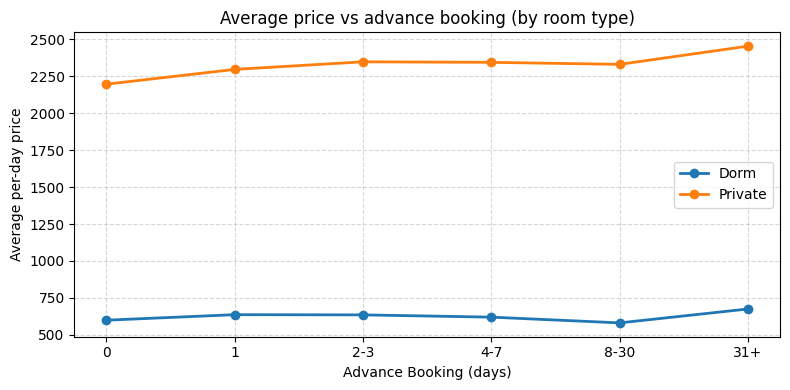

In [26]:
plt.figure(figsize = (8,4))
for room in ['Dorm', 'Private']:
    sub = avg_prices[avg_prices['Room type'] == room]
    plt.plot(sub['Advance Booking'], sub['Average per day price'], marker = 'o', label = room, linewidth=2, markersize=6)

plt.title('Average price vs advance booking (by room type)')
plt.xlabel('Advance Booking (days)')
plt.ylabel('Average per-day price')
plt.legend()
plt.grid(axis = 'both', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

In [15]:
by_day = df.groupby('Booked date: Day of week')['Average per day price'].mean().reset_index()

In [16]:
by_day

,Booked date: Day of week,Average per day price
0,1,1092.188948
1,2,1002.460572
2,3,979.197661
3,4,966.419820
4,5,1006.811443
5,6,1120.299598
6,7,1202.626340


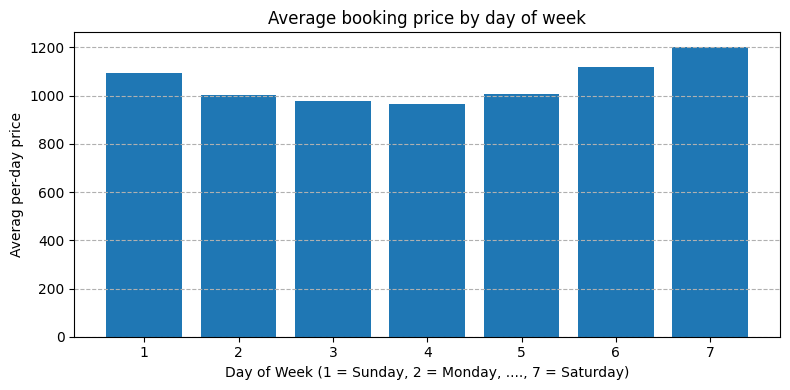

In [30]:
plt.figure(figsize = (8,4))
plt.bar(by_day['Booked date: Day of week'], by_day['Average per day price'])
plt.title('Average booking price by day of week')
plt.xlabel('Day of Week (1 = Sunday, 2 = Monday, ...., 7 = Saturday)')
plt.ylabel('Averag per-day price')
plt.grid(axis = 'y', linestyle = '--')
plt.tight_layout()
plt.show()

In [31]:
by_month = df.groupby('Booked date: Month of year')['Average per day price'].mean().reset_index()

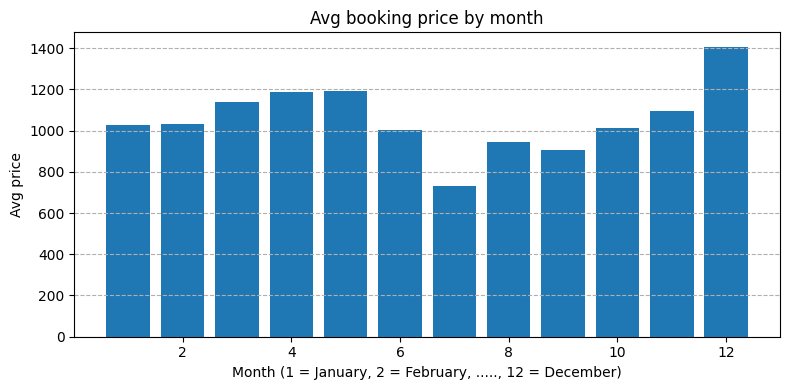

In [32]:
plt.figure(figsize = (8,4))
plt.bar(by_month['Booked date: Month of year'], by_month['Average per day price'])
plt.title('Avg booking price by month')
plt.xlabel('Month (1 = January, 2 = February, ....., 12 = December)')
plt.ylabel('Avg price')
plt.grid(axis = 'y', linestyle = '--')
plt.tight_layout()
plt.show()

In [20]:
df.describe()

,Hostel ID,City ID,Total days booked,Booked date: Day of week,Booked date: Day of month,Booked date: Month of year,Booked days before,Average per day price
count,154820.000000,154820.000000,154820.000000,154820.000000,154820.000000,154820.000000,154820.000000,154820.000000
mean,52.356595,26.438354,5.818253,4.138677,16.062705,6.748585,9.333839,1059.369565
std,47.738008,22.849597,15.912684,2.039601,8.835485,3.541372,13.161009,941.415361
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-21.000000,-23.990000
25%,25.000000,10.000000,2.000000,2.000000,9.000000,4.000000,1.000000,460.845000
50%,35.000000,24.000000,2.000000,4.000000,16.000000,7.000000,4.000000,658.235000
75%,75.000000,28.000000,5.000000,6.000000,24.000000,10.000000,14.000000,1385.115000
max,273.000000,132.000000,741.000000,7.000000,31.000000,12.000000,416.000000,23794.780000


In [21]:
top_cities = df['City ID'].value_counts().nlargest(5).index.to_list()
top_cities

[28, 24, 9, 66, 7]

In [35]:
by_city=df[df['City ID'].isin(top_cities)].groupby(['City ID','Advance Booking'])['Average per day price'].mean().reset_index()

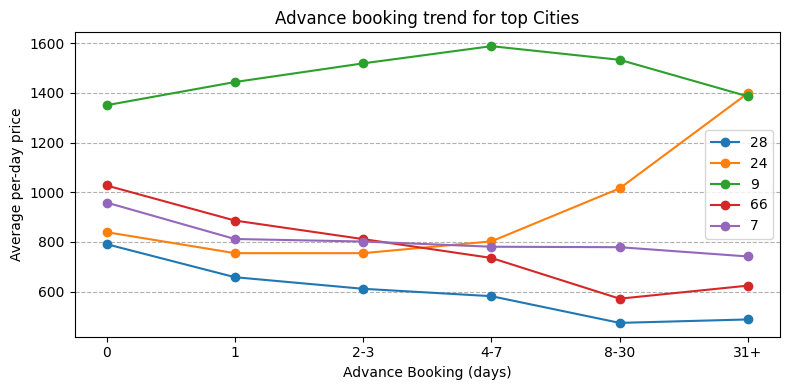

In [36]:
plt.figure(figsize = (8,4))
for city in top_cities:
    sub = by_city[by_city['City ID'] == city]
    plt.plot(sub['Advance Booking'], sub['Average per day price'], marker = 'o', label = city)

plt.title('Advance booking trend for top Cities')
plt.xlabel('Advance Booking (days)')
plt.ylabel('Average per-day price')
plt.legend()
plt.grid(axis = 'y', linestyle = '--')
plt.tight_layout()
plt.show()

In [24]:
by_hostels = df.groupby(['City ID', 'Hostel ID', 'Booked date: Month of year'])['Average per day price'].mean().reset_index()
by_hostels[by_hostels['City ID'] == 28 & by_hostels['Booked date: Month of year']]

,City ID,Hostel ID,Booked date: Month of year,Average per day price
47,8,8,11,1565.500000
113,12,12,12,1032.363162


In [42]:
# Filter only City 24
city_24_df = df[df['City ID'] == 24]

# Calculate monthly average price for each hostel
monthly_prices = city_24_df.groupby(['Hostel ID', 'Booked date: Month of year'])['Average per day price'].mean().reset_index()

# Pivot so each hostel is a column, months are rows
pivot_df = monthly_prices.pivot(index='Booked date: Month of year', columns='Hostel ID', values='Average per day price')

# Compute correlation matrix
corr_matrix = pivot_df.corr()

print(corr_matrix)

Hostel ID       28        39        41        240
Hostel ID                                        
28         1.000000  0.948020  0.927236  0.850782
39         0.948020  1.000000  0.940490  0.849085
41         0.927236  0.940490  1.000000  0.973556
240        0.850782  0.849085  0.973556  1.000000
